<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("car_evaluation.csv" , header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.shape

(1728, 7)

In [7]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = cols

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
for c in cols:
  print(df[c].value_counts() , "--------------------------------------")

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 --------------------------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 --------------------------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64 --------------------------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64 --------------------------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64 --------------------------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64 --------------------------------------
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64 --------------------------------------


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [12]:
x = df.drop(['class'] , axis=1)
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.33 , random_state=42)

In [14]:
xtrain.shape , xtest.shape

((1157, 6), (571, 6))

In [15]:
xtrain.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [16]:
xtrain.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [17]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [18]:
import category_encoders as ce

enc = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

xtrain = enc.fit_transform(xtrain)
xtest = enc.transform(xtest)

In [19]:
xtrain.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [20]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(criterion='gini' , max_depth=3 , random_state=0)
dc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
ypredgini = dc.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy GINI : {0:0.3f}".format(accuracy_score(ytest , ypredgini)))

Accuracy GINI : 0.802


In [23]:
ypredginitrain = dc.predict(xtrain)
print("Accuracy GINI Training : {0:0.3f}".format(accuracy_score(ytrain , ypredginitrain)))

Accuracy GINI Training : 0.787


In [24]:
!pip install graphviz

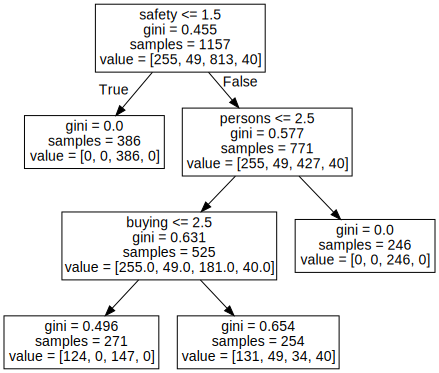

In [25]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dc , feature_names=xtrain.columns)
graph = graphviz.Source(dot_data)
graph

Accuracy entropy : 0.802
Accuracy entropy Training : 0.787


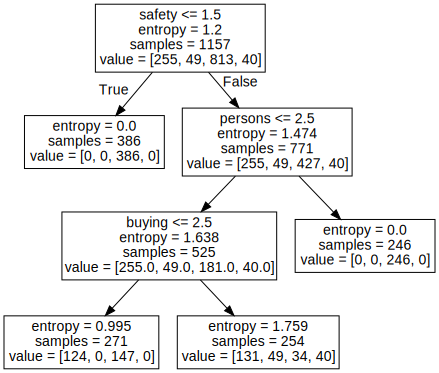

In [27]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(criterion='entropy' , max_depth=3 , random_state=0)
dc.fit(xtrain,ytrain)

ypredentropy = dc.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy entropy : {0:0.3f}".format(accuracy_score(ytest , ypredentropy)))

ypredentropytrain = dc.predict(xtrain)
print("Accuracy entropy Training : {0:0.3f}".format(accuracy_score(ytrain , ypredentropytrain)))

dot_data = tree.export_graphviz(dc , feature_names=xtrain.columns)
graph = graphviz.Source(dot_data)
graph

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(ytest , ypredentropy)
cm

array([[ 73,   0,  56,   0],
       [ 20,   0,   0,   0],
       [ 12,   0, 385,   0],
       [ 25,   0,   0,   0]])

In [32]:
print(classification_report(ytest , ypredentropy))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy entropy : 0.623
Accuracy entropy Training : 0.628


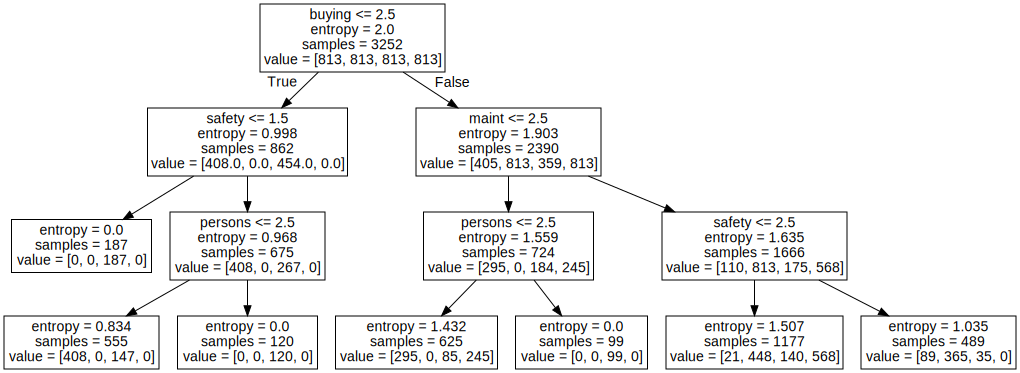

In [39]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

dc = DecisionTreeClassifier(criterion='entropy' , max_depth=3 , random_state=0 , class_weight='balanced')
dc.fit(X_resampled,y_resampled)

ypredentropy = dc.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy entropy : {0:0.3f}".format(accuracy_score(ytest , ypredentropy)))

ypredentropytrain = dc.predict(X_resampled)
print("Accuracy entropy Training : {0:0.3f}".format(accuracy_score(y_resampled , ypredentropytrain)))

dot_data = tree.export_graphviz(dc , feature_names=X_resampled.columns)
graph = graphviz.Source(dot_data)
graph

In [40]:
print(classification_report(ytest , ypredentropy))

              precision    recall  f1-score   support

         acc       0.49      0.81      0.61       129
        good       0.24      0.55      0.34        20
       unacc       1.00      0.55      0.71       397
       vgood       0.23      0.88      0.37        25

    accuracy                           0.62       571
   macro avg       0.49      0.70      0.51       571
weighted avg       0.82      0.62      0.66       571

